In [62]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

Consider the matrix 
$$
  \begin{pmatrix} 1& 1\\ 1& 0.5\end{pmatrix}
$$
and vector 
$$
  b=(1, -1)^T.
$$
Solve the equation
$$
  Ax=b
$$
exactly and then using Tikhonov regularization for constants
$$
  \alpha =\{0, 0.25, 1 \}.
$$

In [63]:
def solveTikhonov(alpha, A, b):
  n = np.shape(A)[1]
  AT = A.T
  Areg = AT @ A + alpha * np.identity(n)
  breg = AT @ b
  x = linalg.solve(Areg, breg)
  return(x)

In [64]:
A = np.array([[1, 1], [1, 0.5]])
b = np.array([[1], [-1]])

# solve the system Ax=b exacty
x_exact = linalg.solve(A, b)
x_exact

array([[-3.],
       [ 4.]])

In [65]:
# solve the system using least squares with Tikhonov regularization
alpha = 0
solveTikhonov(alpha, A, b)

array([[-3.],
       [ 4.]])

In [66]:
alpha = 0.25
solveTikhonov(alpha, A, b)

array([[-0.66666667],
       [ 1.        ]])

In [67]:
alpha = 1
solveTikhonov(alpha, A, b)

array([[-0.16666667],
       [ 0.33333333]])

Suppose, we collected three observations:
<table>
  <tr>
    <th></th>
    <th>xi</th>
    <th>yi</th>
  </tr>
  <tr>
    <td>i=0</td>
    <td>-1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>i=1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>i=2</td>
    <td>1</td>
    <td>2</td>
  </tr>
</table> 

We want to finda polynomial
$$
  f(x)=a_0+a_1x+a_2x^2,
$$
which passes through the three given points.

In [68]:
x_data = np.array([[-1], [0], [1]])
y_data = np.array([[1], [0], [2]])

# design matrix
X =  np.hstack((x_data**0, x_data**1, x_data**2))

a_exact = linalg.solve(X, y_data)
a_exact

array([[0. ],
       [0.5],
       [1.5]])

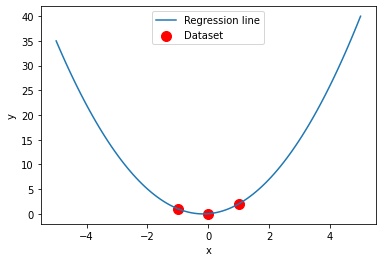

In [69]:
x = np.linspace(-5, 5, 100)
y = a_exact[0] + a_exact[1] * x + a_exact[2] * x**2

plt.scatter(x_data,y_data, label='Dataset', s=100, c='r')
plt.plot(x, y, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Suppose that on top of the previous three observations, we collected the new observation $(𝑥_4,𝑦_4) =	(2,3)$, so we have:
<table>
  <tr>
    <th></th>
    <th>xi</th>
    <th>yi</th>
  </tr>
  <tr>
    <td>i=0</td>
    <td>-1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>i=1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>i=2</td>
    <td>1</td>
    <td>2</td>
  </tr>
   <tr>
    <td>i=2</td>
    <td>2</td>
    <td>3</td>
  </tr>
</table> 

We still want to find the polynomial of degree 2 that passes through our given four points.

In [70]:
x_data_new = np.array([[-1], [0], [1], [2]])
y_data_new = np.array([[1], [0], [2], [3]])

# design matrix
X_new =  np.hstack((x_data_new**0, x_data_new**1, x_data_new**2))
XT_new = X_new.T

# Gramian
XTX_new = XT_new @ X_new
XTX_new

array([[ 4,  2,  6],
       [ 2,  6,  8],
       [ 6,  8, 18]])

In [71]:
#RHS
XTy_new = XT_new @ y_data_new
XTy_new

array([[ 6],
       [ 7],
       [15]])

In [72]:
XTX_new_inv = np.linalg.inv(XTX_new)
XTX_new_inv

array([[ 0.55,  0.15, -0.25],
       [ 0.15,  0.45, -0.25],
       [-0.25, -0.25,  0.25]])

In [73]:
a_ls = XTX_new_inv @ XTy_new
a_ls

array([[0.6],
       [0.3],
       [0.5]])

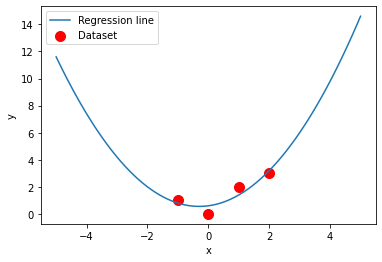

In [74]:
y = a_ls[0] + a_ls[1] * x + a_ls[2] * x**2

plt.scatter(x_data_new,y_data_new, label='Dataset', s=100, c='r')
plt.plot(x, y, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Given the dataset
<table>
  <tr>
    <th></th>
    <th>xi</th>
    <th>yi</th>
  </tr>
  <tr>
    <td>i=0</td>
    <td>1</td>
    <td>2</td>
  </tr>
  <tr>
    <td>i=1</td>
    <td>2</td>
    <td>6</td>
  </tr>
  <tr>
    <td>i=2</td>
    <td>3</td>
    <td>6</td>
  </tr>
   <tr>
    <td>i=2</td>
    <td>4</td>
    <td>10</td>
  </tr>
</table> 
find the linear regression coefficients $𝑎_0$ (intercept) and $𝑎_1$(slope) and the sum of squared residuals using numpy.linalg.lstsq.

In [75]:
x_data = np.array([[1], [2], [3], [4]])
y_data = np.array([[2], [6], [6], [10]])

X = np.hstack((x_data**0, x_data**1))
a, resid, rank, singvals = np.linalg.lstsq(X, y_data, rcond=None)

In [76]:
# regression coefficients
a

array([[6.58854116e-18],
       [2.40000000e+00]])

In [77]:
# sum of squared residuals
resid

array([3.2])